In [549]:
import pandas 
import tensorflow as tf
import nltk
import gensim
import os
import re
import pandas as pd
from konlpy.tag import Mecab
import numpy as np
import random

print(pandas.__version__)
print(tensorflow.__version__)
print(nltk.__version__)
print(gensim.__version__)

1.3.3
2.6.0
3.6.5
3.8.3


In [550]:
file_path = "/aiffel/aiffel/assets/ChatbotData.csv"
df = pd.read_csv(file_path)
df.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [551]:
questions = df['Q']
answers = df['A']

In [553]:
mecab = Mecab()

In [554]:
def preprocess_sentence(sentence):
    sentence = sentence.lower()
    
    """
    영문자, 한글, 숫자, 주요 특수문자를 제외한 모든 문자를 제거합니다.
    """
    special_chars = r"!?"     # 주요 특수문자 
    pattern = r"[^a-zA-Z가-힣0-9" + re.escape(special_chars) + r"\s]"
    sentence = re.sub(pattern, "", sentence)    # 정규식을 사용하여 문자 제거

    sentence = sentence.strip()
    return sentence

In [555]:
cleaned_questions = [preprocess_sentence(question) for question in questions]
cleaned_answers= [preprocess_sentence(answer) for answer in answers]

In [556]:
cleaned_answers[0]

'하루가 또 가네요.'

In [557]:
# !pip install --upgrade gensim==3.8.3

In [558]:
from collections import OrderedDict

def get_corpus(questions, answers, tokenizer, max_len=40):
    question_corpus = []
    answer_corpus = []

    for que, ans in zip(questions, answers):
        print(que)
        question_tokens = tokenizer(que)
        answer_tokens = tokenizer(ans)

        if len(question_tokens) > max_len or len(answer_tokens) > max_len:
            continue

        question_corpus.append(question_tokens)
        answer_corpus.append(answer_tokens)

    print(len(question_corpus))
    print(len(answer_corpus))
    corpus_pairs = list(zip(question_corpus, answer_corpus))
#     print(len(corpus_pairs))
    question_corpus = [pair[0] for pair in corpus_pairs]
    answer_corpus = [pair[1] for pair in corpus_pairs]

    return question_corpus, answer_corpus


In [559]:
from konlpy.tag import Mecab
mecab = Mecab()

tokenizer = lambda x: mecab.morphs(x)

question_corpus, answer_corpus = get_corpus(cleaned_questions, cleaned_answers, tokenizer)

12시 땡!
1지망 학교 떨어졌어
3박4일 놀러가고 싶다
3박4일 정도 놀러가고 싶다
ppl 심하네
sd카드 망가졌어
sd카드 안돼
sns 맞팔 왜 안하지
sns 시간낭비인 거 아는데 매일 하는 중
sns 시간낭비인데 자꾸 보게됨
sns보면 나만 빼고 다 행복해보여
가끔 궁금해
가끔 뭐하는지 궁금해
가끔은 혼자인게 좋다
가난한 자의 설움
가만 있어도 땀난다
가상화폐 쫄딱 망함
가스불 켜고 나갔어
가스불 켜놓고 나온거 같아
가스비 너무 많이 나왔다.
가스비 비싼데 감기 걸리겠어
가스비 장난 아님
가장 확실한 건 뭘까?
가족 여행 가기로 했어
가족 여행 고고
가족 여행 어디로 가지?
가족 있어?
가족관계 알려 줘
가족끼리 여행간다.
가족들 보고 싶어
가족들이랑 서먹해
가족들이랑 서먹해졌어
가족들이랑 어디 가지?
가족들이랑 여행 갈거야
가족여행 가야지
가족이 누구야?
가족이랑 여행 가려고
가족한테 스트레스 풀었어
가출할까?
가출해도 갈 데가 없어
간만에 떨리니까 좋더라
간만에 쇼핑 중
간만에 휴식 중
간식 뭐 먹을까
간식 추천
간장치킨 시켜야지
간접흡연 싫어
갈까 말까 고민 돼
갈까 말까?
감 말랭이 먹고 싶다.
감 말랭이 먹어야지
감기 같애
감기 걸린 것 같아
감기 기운이 있어
감기 들 거 같애
감기가 오려나
감기약이 없어
감기인거 같애
감미로운 목소리 좋아
감정이 쓰레기통처럼 엉망진창이야
감정컨트롤을 못하겠어
감정컨트롤이 안돼
감히 나를 무시하는 애가 있어
갑자기 나쁜 생각이 막 들더라
갑자기 눈물 나
갑자기 물어봐서 당황했어
갑자기 불편한 사이가 된 거 같아
강렬한 첫인상 남겨야 하는데
강아지 키우고 싶어
강아지 키우고 싶은데 역시 안돼겠지
강아지 키울 수 있을까
강아지 키울까
강원도 가서 살까?
같이 게임하자고 해도 되나?
같이 놀러갈 친구가 없어
같이 먹었는데 나만 살찐 거 같아
같이 수영장 가기로 했어
같이 있으면 힘든데 붙잡고 싶어
같이 피씨방 가자고 해볼까?
같이 할 수 있는 취미 생활 뭐 있을까
개강룩 입어볼까
개강옷 예쁘게 입어 볼까
개강이다
개강

In [560]:
print(question_corpus[0], answer_corpus[0])

['12', '시', '땡', '!'] ['하루', '가', '또', '가', '네요', '.']


In [561]:
# !pip install --upgrade gensim==3.8.3
print(gensim.__version__)

3.8.3


### Without Augmentation

In [562]:
# q_corpus = cleaned_questions
# a_corpus = cleaned_answers 
# data = q_corpus + a_corpus

In [563]:
# # 전체 데이터에 대한 단어 사전 구축, 벡터화
# tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None, filters=' ', oov_token='<unk>')
# tokenizer.fit_on_texts(data)
# tensor = tokenizer.texts_to_sequences(data)
# tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

In [564]:
# len(tensor)

In [565]:
# print(data[0], data[11823])

In [566]:
# enc_train, dec_train = tensor[:11823], tensor[11823:]

## Augmentation

In [567]:
from gensim.models import KeyedVectors

# 모델 로드
model_path = "/aiffel/aiffel/assets/ko.bin" 
wv = gensim.models.Word2Vec.load(model_path)

In [568]:
def lexical_sub(tokens, wv):   
    selected_tok = random.choice(tokens)
#     print("선택 단어:", selected_tok)

    try:
        similar_words = wv.most_similar(selected_tok, topn=5)
#         print(f"'유사 단어:", similar_words)
        
        similar_word = similar_words[0][0]  # 가장 유사한 단어를 선택
    except KeyError:
        similar_word = selected_tok

    result = " ".join([similar_word if tok == selected_tok else tok for tok in tokens])

    return result


In [569]:
arg_q_corpus = [lexical_sub(x, wv) for x in question_corpus]
arg_a_corpus = [lexical_sub(x, wv) for x in answer_corpus]

/tmp/ipykernel_142/4293971751.py:21: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  similar_words = wv.most_similar(selected_tok, topn=5)


In [570]:
print(f"Q : {question_corpus[0]} {arg_q_corpus[0]}")
print(f"A : {answer_corpus[0]} {arg_a_corpus[0]}")

Q : ['12', '시', '땡', '!'] 12 시 끗 !
A : ['하루', '가', '또', '가', '네요', '.'] 하루 놀드 또 놀드 네요 .


In [571]:
q_corpus = cleaned_questions + arg_q_corpus  
a_corpus = cleaned_answers + arg_a_corpus 

In [572]:
q_corpus, a_corpus = get_corpus(q_corpus, a_corpus, tokenizer)

12시 땡!
1지망 학교 떨어졌어
3박4일 놀러가고 싶다
3박4일 정도 놀러가고 싶다
ppl 심하네
sd카드 망가졌어
sd카드 안돼
sns 맞팔 왜 안하지
sns 시간낭비인 거 아는데 매일 하는 중
sns 시간낭비인데 자꾸 보게됨
sns보면 나만 빼고 다 행복해보여
가끔 궁금해
가끔 뭐하는지 궁금해
가끔은 혼자인게 좋다
가난한 자의 설움
가만 있어도 땀난다
가상화폐 쫄딱 망함
가스불 켜고 나갔어
가스불 켜놓고 나온거 같아
가스비 너무 많이 나왔다.
가스비 비싼데 감기 걸리겠어
가스비 장난 아님
가장 확실한 건 뭘까?
가족 여행 가기로 했어
가족 여행 고고
가족 여행 어디로 가지?
가족 있어?
가족관계 알려 줘
가족끼리 여행간다.
가족들 보고 싶어
가족들이랑 서먹해
가족들이랑 서먹해졌어
가족들이랑 어디 가지?
가족들이랑 여행 갈거야
가족여행 가야지
가족이 누구야?
가족이랑 여행 가려고
가족한테 스트레스 풀었어
가출할까?
가출해도 갈 데가 없어
간만에 떨리니까 좋더라
간만에 쇼핑 중
간만에 휴식 중
간식 뭐 먹을까
간식 추천
간장치킨 시켜야지
간접흡연 싫어
갈까 말까 고민 돼
갈까 말까?
감 말랭이 먹고 싶다.
감 말랭이 먹어야지
감기 같애
감기 걸린 것 같아
감기 기운이 있어
감기 들 거 같애
감기가 오려나
감기약이 없어
감기인거 같애
감미로운 목소리 좋아
감정이 쓰레기통처럼 엉망진창이야
감정컨트롤을 못하겠어
감정컨트롤이 안돼
감히 나를 무시하는 애가 있어
갑자기 나쁜 생각이 막 들더라
갑자기 눈물 나
갑자기 물어봐서 당황했어
갑자기 불편한 사이가 된 거 같아
강렬한 첫인상 남겨야 하는데
강아지 키우고 싶어
강아지 키우고 싶은데 역시 안돼겠지
강아지 키울 수 있을까
강아지 키울까
강원도 가서 살까?
같이 게임하자고 해도 되나?
같이 놀러갈 친구가 없어
같이 먹었는데 나만 살찐 거 같아
같이 수영장 가기로 했어
같이 있으면 힘든데 붙잡고 싶어
같이 피씨방 가자고 해볼까?
같이 할 수 있는 취미 생활 뭐 있을까
개강룩 입어볼까
개강옷 예쁘게 입어 볼까
개강이다
개강

In [573]:
len(q_corpus)

23646

In [574]:
print(q_corpus[0], q_corpus[11823])

['12', '시', '땡', '!'] ['12', '시', '끗', '!']


In [575]:
# #  타겟 데이터에 <start>, <end> 토큰 추가
# a_corpus = [["<start>"] + a + ["<end>"] for a in a_corpus]
# <start>와 <end> 토큰 추가하기
tmp_list = []
def add_start_end(a_corpus):
    for a in a_corpus:
        tmp_list.append(['<start>'] + a + ['<end>'])
    return tmp_list
a_corpus = add_start_end(a_corpus)

In [576]:
print(a_corpus[0], a_corpus[11823])

['<start>', '하루', '가', '또', '가', '네요', '.', '<end>'] ['<start>', '하루', '놀', '드', '또', '놀', '드', '네요', '.', '<end>']


In [577]:
data = q_corpus + a_corpus

# Step 5. 데이터 벡터화


In [578]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None, filters=' ', oov_token='<unk>')
tokenizer.fit_on_texts(data)
tensor = tokenizer.texts_to_sequences(data)
tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

In [579]:
len(tokenizer.index_word)

7850

In [580]:
VOCAB_SIZE = len(tokenizer.index_word) + 2 # 특수 토큰

In [581]:
tensor.shape

(47292, 42)

In [587]:
print(data[0]) 
print(data[23646])

['12', '시', '땡', '!']
['<start>', '하루', '가', '또', '가', '네요', '.', '<end>']


In [588]:
enc_train, dec_train = tensor[:23646], tensor[23646:]

In [589]:
from sklearn.model_selection import train_test_split
enc_train, enc_test, dec_train, dec_test = train_test_split(enc_train, dec_train, test_size=0.05, random_state=42)

print(enc_train.shape, enc_test.shape)
print(dec_train.shape, dec_test.shape)

(22463, 42) (1183, 42)
(22463, 42) (1183, 42)


# Step 6. 훈련하기


In [590]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, (2*(i//2)) / np.float32(d_model))

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

In [591]:
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_lookahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_enc_mask = generate_padding_mask(src)

    dec_lookahead_mask = generate_lookahead_mask(tgt.shape[1])
    dec_tgt_padding_mask = generate_padding_mask(tgt)
    dec_mask = tf.maximum(dec_tgt_padding_mask, dec_lookahead_mask)

    return enc_mask, dec_enc_mask, dec_mask

In [592]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        self.depth = d_model // self.num_heads
        
        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
        
        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)  

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions
        

    def split_heads(self, x):
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x

    
    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
        
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)
                        
        out = self.combine_heads(out)
        out = self.linear(out)
            
        return out, attention_weights

In [593]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff

        self.fc1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.fc2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
            
        return out

In [594]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        '''
        Multi-Head Attention
        '''
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual
        
        '''
        Position-Wise Feed Forward Network
        '''
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual
        
        return out, enc_attn

In [595]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
    
    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        '''
        Masked Multi-Head Attention
        '''
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual

        '''
        Multi-Head Attention
        '''
        residual = out
        out = self.norm_2(out)
        out, dec_enc_attn = self.enc_dec_attn(Q=out, K=enc_out, V=enc_out, mask=dec_enc_mask)
        out = self.do(out)
        out += residual
        
        '''
        Position-Wise Feed Forward Network
        '''
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

In [596]:
class Encoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]
    
        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        out = x
    
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
        
        return out, enc_attns

In [597]:
class Decoder(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]
                            
    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        out = x
    
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, dec_enc_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

In [598]:
class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared_fc=True,
                    shared_emb=False):
        super(Transformer, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out

        
    def call(self, enc_in, dec_in, enc_mask, dec_enc_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, dec_enc_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

In [599]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=3000): #4000
        super(LearningRateScheduler, self).__init__()
        
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)



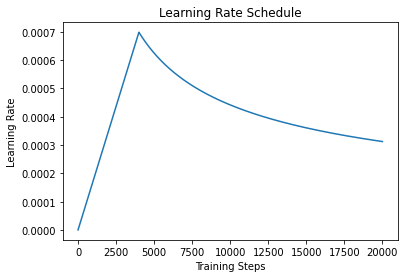

In [600]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

d_model = 512
warmup_steps = 4000
learning_rate_fn = LearningRateScheduler(d_model, warmup_steps)

steps = np.arange(1, 20000)  # 1 ~ 20000 step
lrs = [learning_rate_fn(step).numpy() for step in steps]

plt.plot(steps, lrs)
plt.xlabel("Training Steps")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.show()


In [607]:
n_layers = 3
d_model = 512 #1024
n_heads = 8
d_ff = 512 #2048 
dropout = 0.3
EPOCHS = 20
BATCH_SIZE = 64


In [608]:
learning_rate = LearningRateScheduler(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                        beta_1=0.9,
                                        beta_2=0.98, 
                                        epsilon=1e-9)

In [609]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [610]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    tgt_in = tgt[:, :-1]  # Decoder의 input
    gold = tgt[:, 1:]     # Decoder의 output과 비교하기 위해 right shift를 통해 생성한 최종 타겟

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions)
        

    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

In [1]:
from tqdm import tqdm

transformer = Transformer(
    n_layers=n_layers,
    d_model=d_model,
    n_heads=n_heads,
    d_ff=d_ff,
    src_vocab_size=VOCAB_SIZE,
    tgt_vocab_size=VOCAB_SIZE,
    pos_len=40, #200,
    dropout=dropout,
    shared_fc=True,
    shared_emb=True)


for epoch in range(EPOCHS):
    total_loss = 0

    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = train_step(enc_train[idx:idx+BATCH_SIZE],
                                                                     dec_train[idx:idx+BATCH_SIZE],
                                                                     transformer,
                                                                     optimizer)

        total_loss += batch_loss
        

        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))

In [513]:
samples = [
    "12시 땡!",
    "1지망 학교 떨어졌어",
    "3박4일 놀러가고 싶다",
    "3박4일 정도 놀러가고 싶다",
    "PPL 심하네"
]

In [514]:
Q_list = []
A_list = []
def get_result(samples, model, tokenizer):
        print(f'layers: {n_layers}')
        print(f'd_model: {d_model}')
        print(f'd_ff: {d_ff}')
        print(f'dropout: {dropout}')
        print(f'Batch Size: {BATCH_SIZE}')
        print(f'Epoch At: {EPOCHS}')
        print()
        
        for sample in samples:
            result,_,_,_ = evaluate(sample, model, tokenizer)
            print(f'Q: {sample}')
            print(f'A: {result}')
            Q_list.append(sample)
            A_list.append(result)
            print()
            

In [515]:
a_samples = [
    '하루가 또 가네요.',
    '위로해 드립니다.',
    '여행은 언제나 좋죠.',
    '여행은 언제나 좋죠.',
    '눈살이 찌푸려지죠.'
]

In [516]:
get_result(samples, transformer, tokenizer)

layers: 3
d_model: 512
d_ff: 1024
dropout: 0.3
Batch Size: 64
Epoch At: 20

Q: 12시 땡!
A: <start> 또 가 네요 .

Q: 1지망 학교 떨어졌어
A: <start> 아직 도 힘들 겠 죠 .

Q: 3박4일 놀러가고 싶다
A: <start> 3 예요 .

Q: 3박4일 정도 놀러가고 싶다
A: <start> 3 예요 .

Q: PPL 심하네
A: <start> 오늘 은 쉬 면서 였을 거 예요 .



In [386]:
get_result(samples, transformer, tokenizer)

layers: 2
d_model: 512
d_ff: 512
dropout: 0.3
Batch Size: 64
Epoch At: 20

Q: 12시 땡!
A: 가 주일 가 또 가 네요 .

Q: 1지망 학교 떨어졌어
A: 자기 바라 요 .

Q: 3박4일 놀러가고 싶다
A: 물리 적 나이 가 많 은 선택 이 길 바라 겠 네요 .

Q: 3박4일 정도 놀러가고 싶다
A: 물리 적 나이 가 많 은 선택 이 길 바라 겠 네요 .

Q: PPL 심하네
A: 눈살 이 찌푸려 꼼짝 죠 .



In [388]:
for idx in range(len(a_samples)):
    
    reference = a_samples[idx].split()
    candidate = A_list[idx].split()
    print(reference)
    print("원문:", reference)
    print("번역문:", candidate)
    print("BLEU Score:", sentence_bleu([reference], candidate))

['하루가', '또', '가네요.']
원문: ['하루가', '또', '가네요.']
번역문: ['가', '주일', '가', '또', '가', '네요', '.']
BLEU Score: 1.1200407237786664e-231
['위로해', '드립니다.']
원문: ['위로해', '드립니다.']
번역문: ['자기', '바라', '요', '.']
BLEU Score: 0
['여행은', '언제나', '좋죠.']
원문: ['여행은', '언제나', '좋죠.']
번역문: ['물리', '적', '나이', '가', '많', '은', '선택', '이', '길', '바라', '겠', '네요', '.']
BLEU Score: 0
['여행은', '언제나', '좋죠.']
원문: ['여행은', '언제나', '좋죠.']
번역문: ['물리', '적', '나이', '가', '많', '은', '선택', '이', '길', '바라', '겠', '네요', '.']
BLEU Score: 0
['눈살이', '찌푸려지죠.']
원문: ['눈살이', '찌푸려지죠.']
번역문: ['눈살', '이', '찌푸려', '꼼짝', '죠', '.']
BLEU Score: 0


In [408]:
get_result(samples, transformer, tokenizer)

layers: 3
d_model: 512
d_ff: 1024
dropout: 0.3
Batch Size: 64
Epoch At: 20

Q: 12시 땡!
A: 가 주일 가 있 네요 .

Q: 1지망 학교 떨어졌어
A: 잘 지내 는지 없 죠 .

Q: 3박4일 놀러가고 싶다
A: 될 거 예요 .

Q: 3박4일 정도 놀러가고 싶다
A: 될 거 예요 .

Q: PPL 심하네
A: 눈살 이 찌푸려 지 죠 .



In [410]:
for idx in range(len(a_samples)):
    
    reference = a_samples[idx].split()
    candidate = A_list[idx].split()
    print(reference)
    print("원문:", reference)
    print("번역문:", candidate)
    print("BLEU Score:", sentence_bleu([reference], candidate))

['하루가', '또', '가네요.']
원문: ['하루가', '또', '가네요.']
번역문: ['가', '주일', '가', '있', '네요', '.']
BLEU Score: 0
['위로해', '드립니다.']
원문: ['위로해', '드립니다.']
번역문: ['잘', '지내', '는지', '없', '죠', '.']
BLEU Score: 0
['여행은', '언제나', '좋죠.']
원문: ['여행은', '언제나', '좋죠.']
번역문: ['될', '거', '예요', '.']
BLEU Score: 0
['여행은', '언제나', '좋죠.']
원문: ['여행은', '언제나', '좋죠.']
번역문: ['될', '거', '예요', '.']
BLEU Score: 0
['눈살이', '찌푸려지죠.']
원문: ['눈살이', '찌푸려지죠.']
번역문: ['눈살', '이', '찌푸려', '지', '죠', '.']
BLEU Score: 0


#### 확인해 봐야할 상황
1. 러닝스케줄러, Epoch별 loss가 확 떨어졌다가 step이 증가할 수록 오름 # EX (0.63 -> 0.45 -> 0.57) 
    - warmup을 줄이는것 x (lr warmup을 100으로 극단적으로 줄이니 Loss가 500 으로 시작)
2. Vocab size를 줄이면 학습이 되지 않음
